In [1]:
import pandas as pd
import warnings
from matplotlib.pyplot import rcParams
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')

In [2]:
train_data_path = 'train.csv'
test_data_path = 'test.csv'

In [3]:
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [5]:
train_df.shape

(7352, 563)

In [6]:
train_df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [7]:
X_train = train_df.drop('Activity', axis=1)
y_train = train_df['Activity']

X_test = test_df.drop('Activity', axis=1)
y_test = test_df['Activity']

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

seed = 1
forest = RandomForestClassifier(random_state=seed)
linear = LogisticRegression(max_iter=2000, random_state=seed)
tree = DecisionTreeClassifier(random_state=seed)
svm = LinearSVC(max_iter=2500, random_state=seed)

In [9]:
models = [forest, linear, tree, svm]
model_names = [
    'Random Forests',
    'Logistic Regression',
    'Decision Tree',
    'Support Vector Machine']

In [10]:
from sklearn.metrics import accuracy_score

def get_accuracy(model, data):
    X_train, X_test, y_train, y_test = data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [11]:
from sklearn.metrics import f1_score

def get_fscore(model, data):
    X_train, X_test, y_train, y_test = data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1score = f1_score(y_test, y_pred,average="weighted")
    return f1score

In [12]:
from sklearn.metrics import precision_score

def get_precisionscore(model, data):
    X_train, X_test, y_train, y_test = data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precisionscore = precision_score(y_test, y_pred,average="weighted")
    return precisionscore

In [13]:
data = (X_train, X_test, y_train, y_test)
for model, model_name in zip(models, model_names):
    acc = get_accuracy(model, data)
    precisionscore = get_precisionscore(model, data)
    f1score = get_fscore(model, data)
    print(model_name)
    print('=========================')
    print('Accuracy: %.2f%%'%(acc*100))
    print('precision: %.2f%%'%(precisionscore*100))  
    print('f1_score: %.2f%%'%(f1score*100))
    print()

Random Forests
Accuracy: 92.57%
precision: 92.67%
f1_score: 92.54%

Logistic Regression
Accuracy: 95.96%
precision: 96.15%
f1_score: 95.94%

Decision Tree
Accuracy: 86.12%
precision: 86.16%
f1_score: 86.08%

Support Vector Machine
Accuracy: 96.47%
precision: 96.61%
f1_score: 96.45%



Text(0.5, 0, 'ML_models')

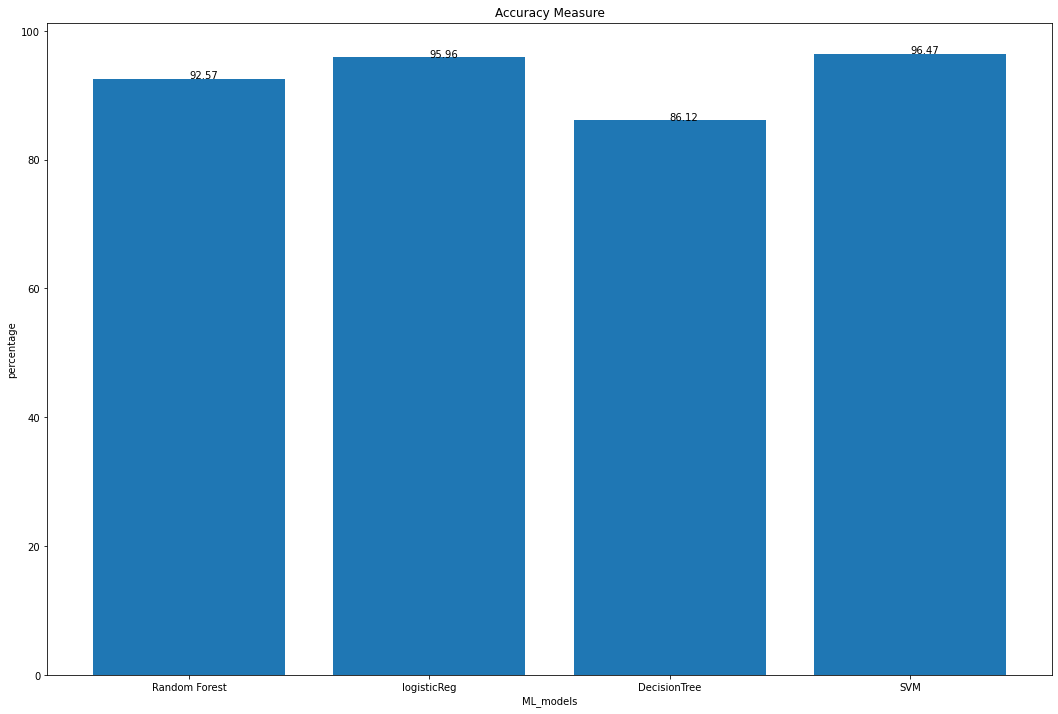

In [14]:
rcParams['figure.figsize'] = 18, 12
modelName = ['Random Forest', 'logisticReg', 'DecisionTree', 'SVM']
accM = [ 92.57, 95.96,  86.12, 96.47]
preM = [92.67, 96.15, 86.16, 96.61]
f1M = [92.54, 95.94, 86.08, 96.45]
plt.bar(modelName, accM)
for i in range(len(modelName)):
     plt.text(i, accM[i], accM[i])
plt.title('Accuracy Measure')
plt.ylabel("percentage")
plt.xlabel("ML_models")

Text(0.5, 0, 'ML_models')

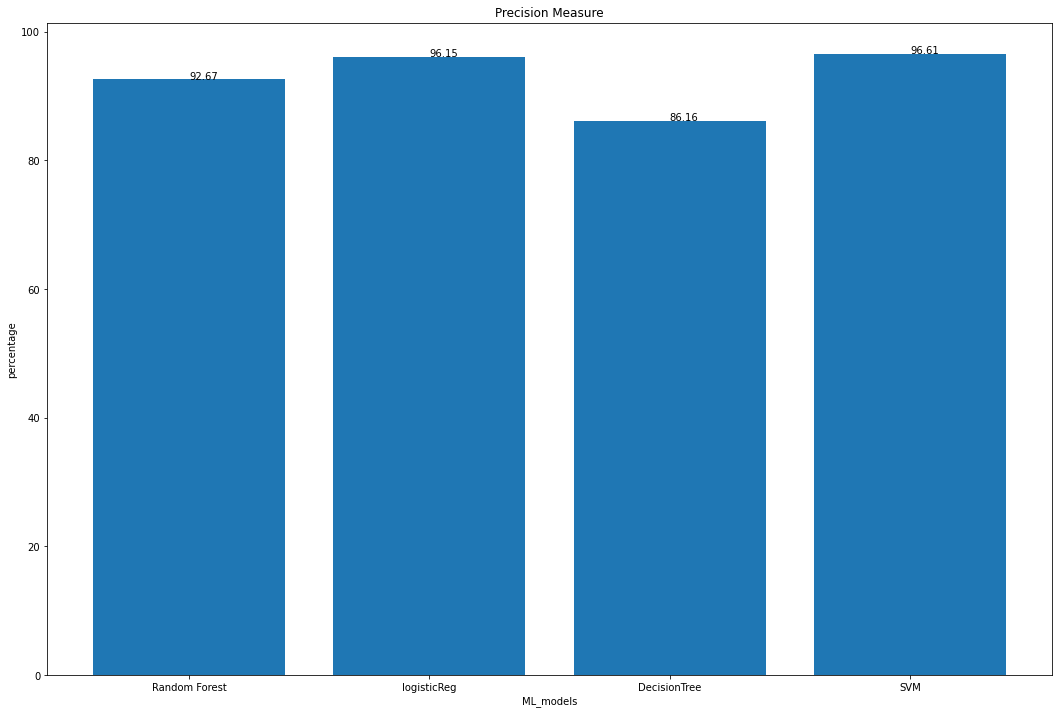

In [15]:
plt.bar(modelName, preM)
for i in range(len(modelName)):
     plt.text(i, preM[i], preM[i])
plt.title('Precision Measure')
plt.ylabel("percentage")
plt.xlabel("ML_models")

Text(0.5, 0, 'ML_models')

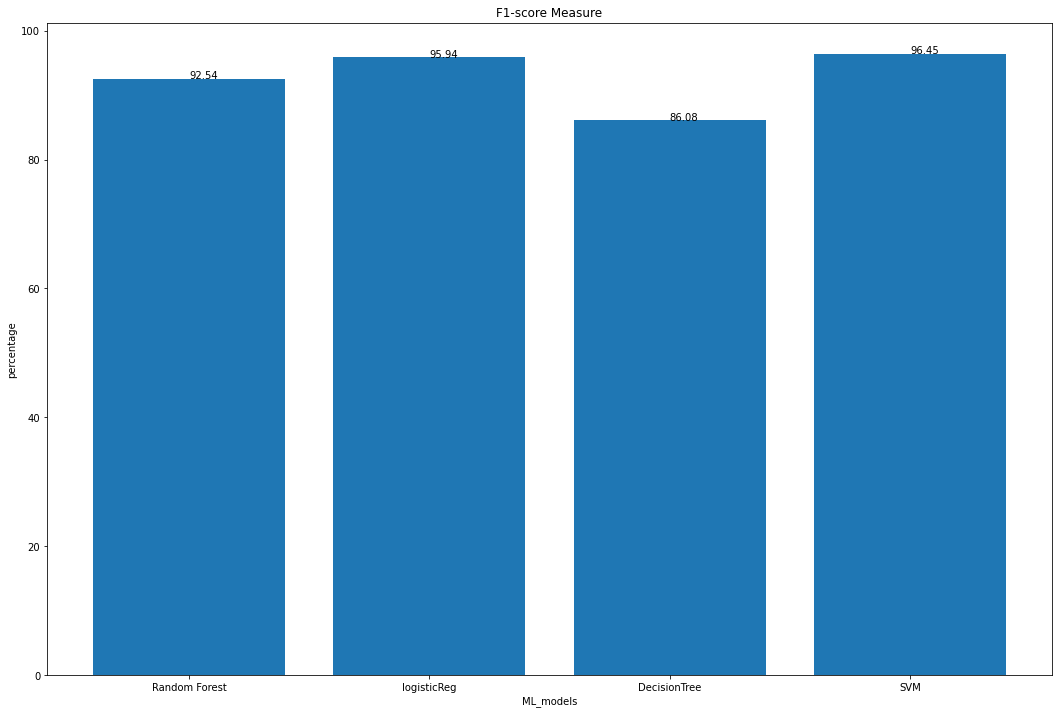

In [16]:
plt.bar(modelName, f1M)
for i in range(len(modelName)):
     plt.text(i, f1M[i], f1M[i])
plt.title('F1-score Measure')
plt.ylabel("percentage")
plt.xlabel("ML_models")

<Figure size 5760x2880 with 0 Axes>

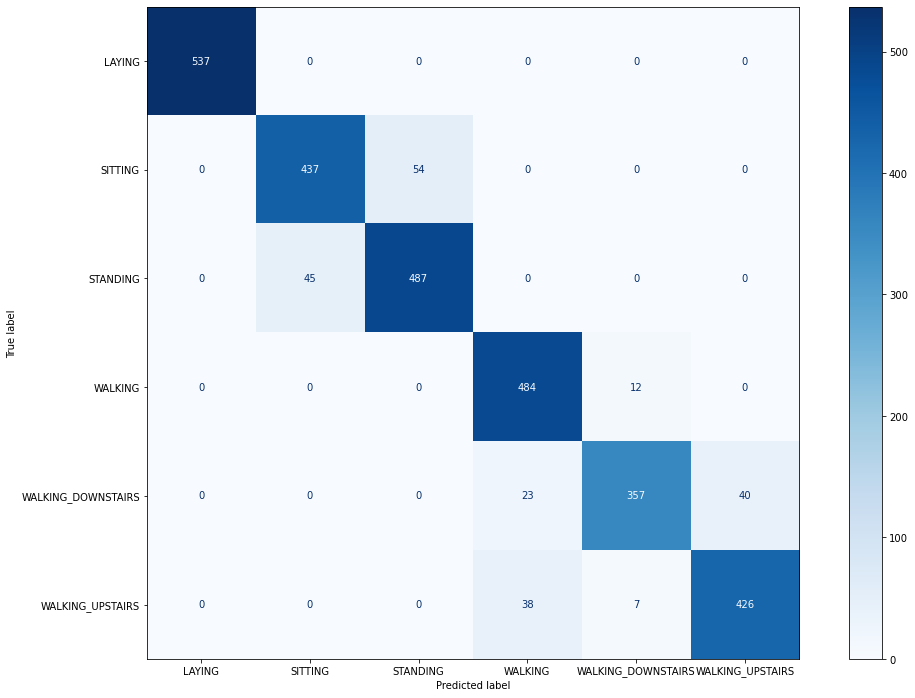

In [17]:
plt.figure(figsize=(80,40))
plot_confusion_matrix(forest, X_test, y_test,cmap=plt.cm.Blues)
plt.grid(False)
plt.rcParams.update({'font.size': 25})
plt.show()

<Figure size 5760x2880 with 0 Axes>

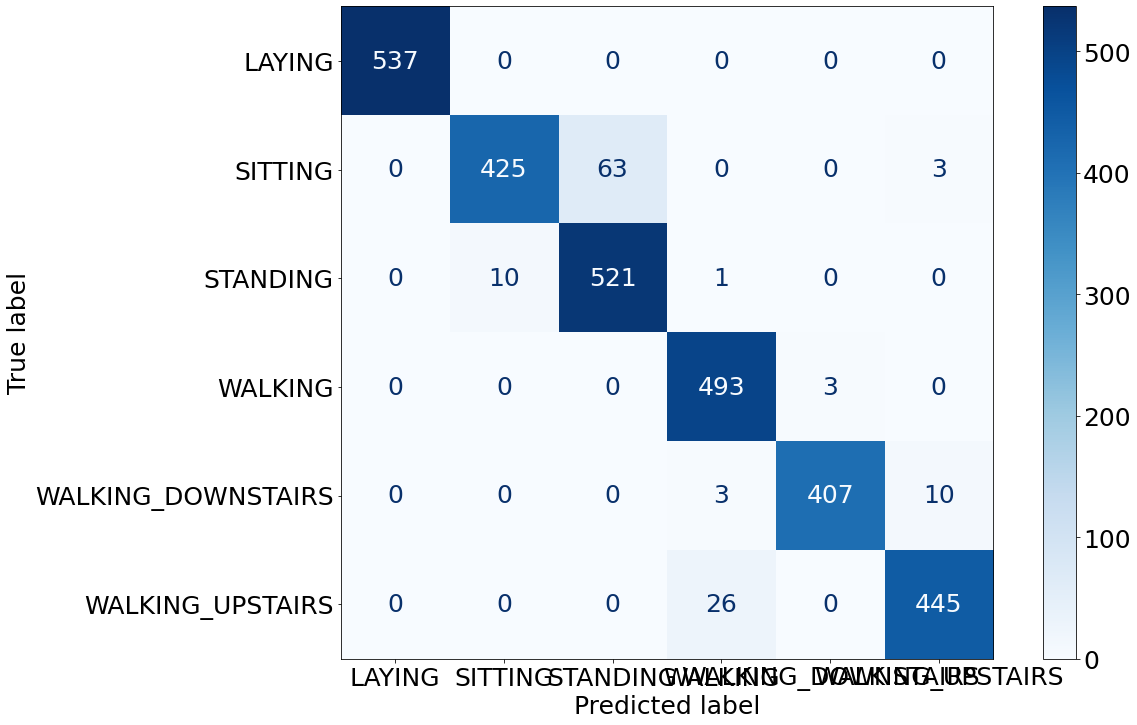

In [18]:
plt.figure(figsize=(80,40))
plot_confusion_matrix(linear, X_test, y_test,cmap=plt.cm.Blues)
plt.grid(False)
plt.rcParams.update({'font.size': 25})
plt.show()

<Figure size 5760x2880 with 0 Axes>

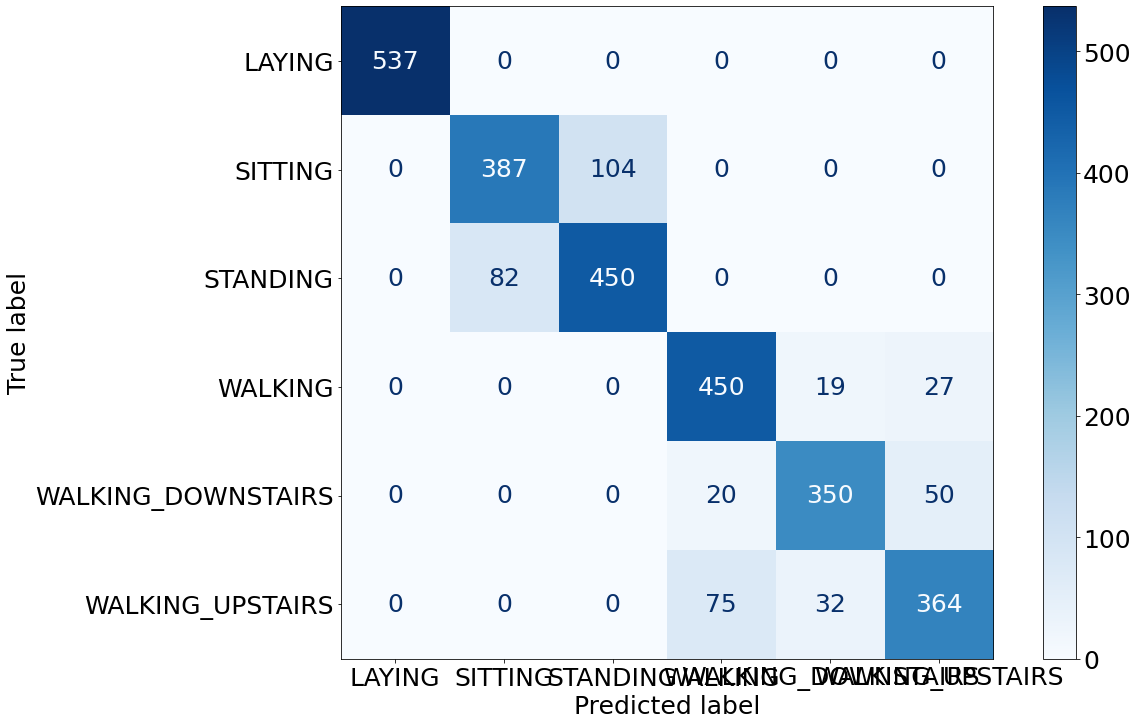

In [19]:
plt.figure(figsize=(80,40))
plot_confusion_matrix(tree, X_test, y_test,cmap=plt.cm.Blues)
plt.grid(False)
plt.rcParams.update({'font.size': 25})
plt.show()

<Figure size 5760x2880 with 0 Axes>

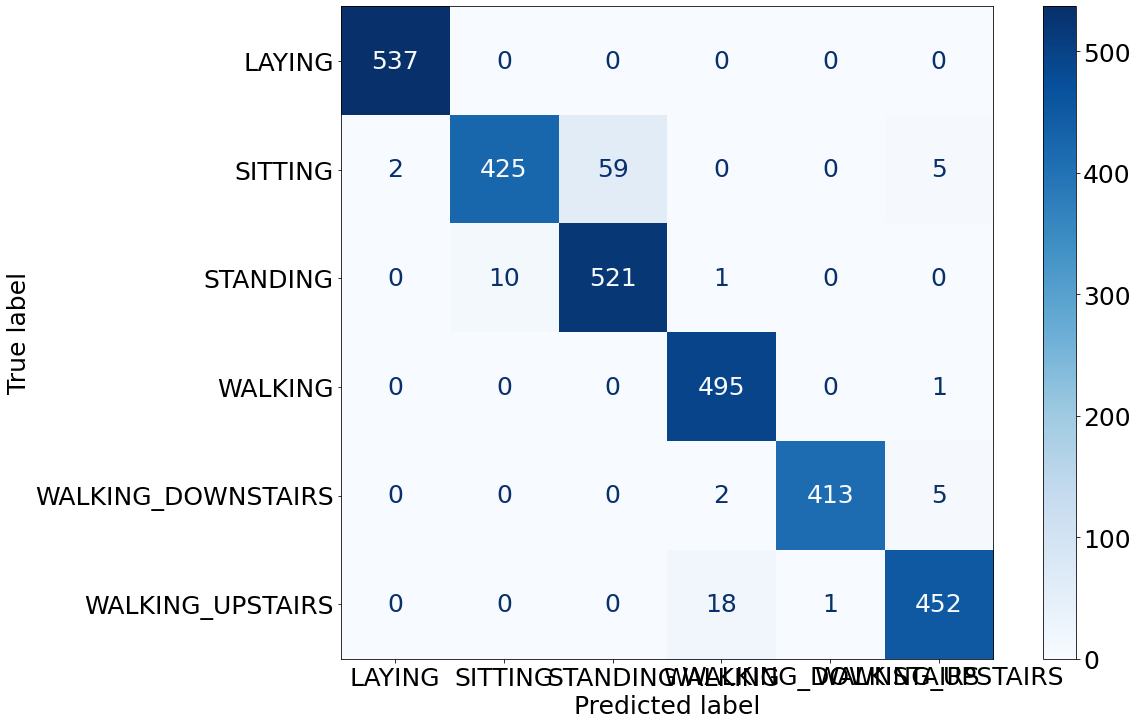

In [20]:
plt.figure(figsize=(80,40))
plot_confusion_matrix(svm, X_test, y_test,cmap=plt.cm.Blues)
plt.grid(False)
plt.rcParams.update({'font.size': 25})
plt.show()